# OPTION PRICER

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

In [2]:
#### make a function that lets you specify a few parameters and calculates the payoff
# S = stock underlying # K = strike price # Price = premium paid for option
def long_call(S, K, Price):
    # Long Call Payoff = max(Stock Price - Strike Price, 0) # If we are long a call
    P = list(map(lambda x: max(x - K, 0) - Price, S))
    return P

def long_put(S, K, Price):
    # Long Put Payoff = max(Strike Price - Stock Price, 0) # If we are long a call
    P = list(map(lambda x: max(K - x, 0) - Price, S))
    return P

def short_call(S, K, Price):
    # Payoff of a short call is just the inverse of the payoff of a long call
    P = long_call(S, K, Price)
    return [-1.0 * p for p in P]

def short_put(S, K, Price):
    # Payoff of a short put is just the inverse of the payoff of a long put
    P = long_put(S, K, Price)
    return [-1.0 * p for p in P]

def binary_call(S, K, Price):
    # Payoff of a binary call is either: # 1. Strike if current price > strike
    P = list(map(lambda x: K - Price if x > K else 0 - Price, S))
    return P

def binary_put(S, K, Price):
    # Payoff of a binary put is either: # 1. Strike if current price < strike
    P = list(map(lambda x: K - Price if x < K else 0 - Price, S))
    return P

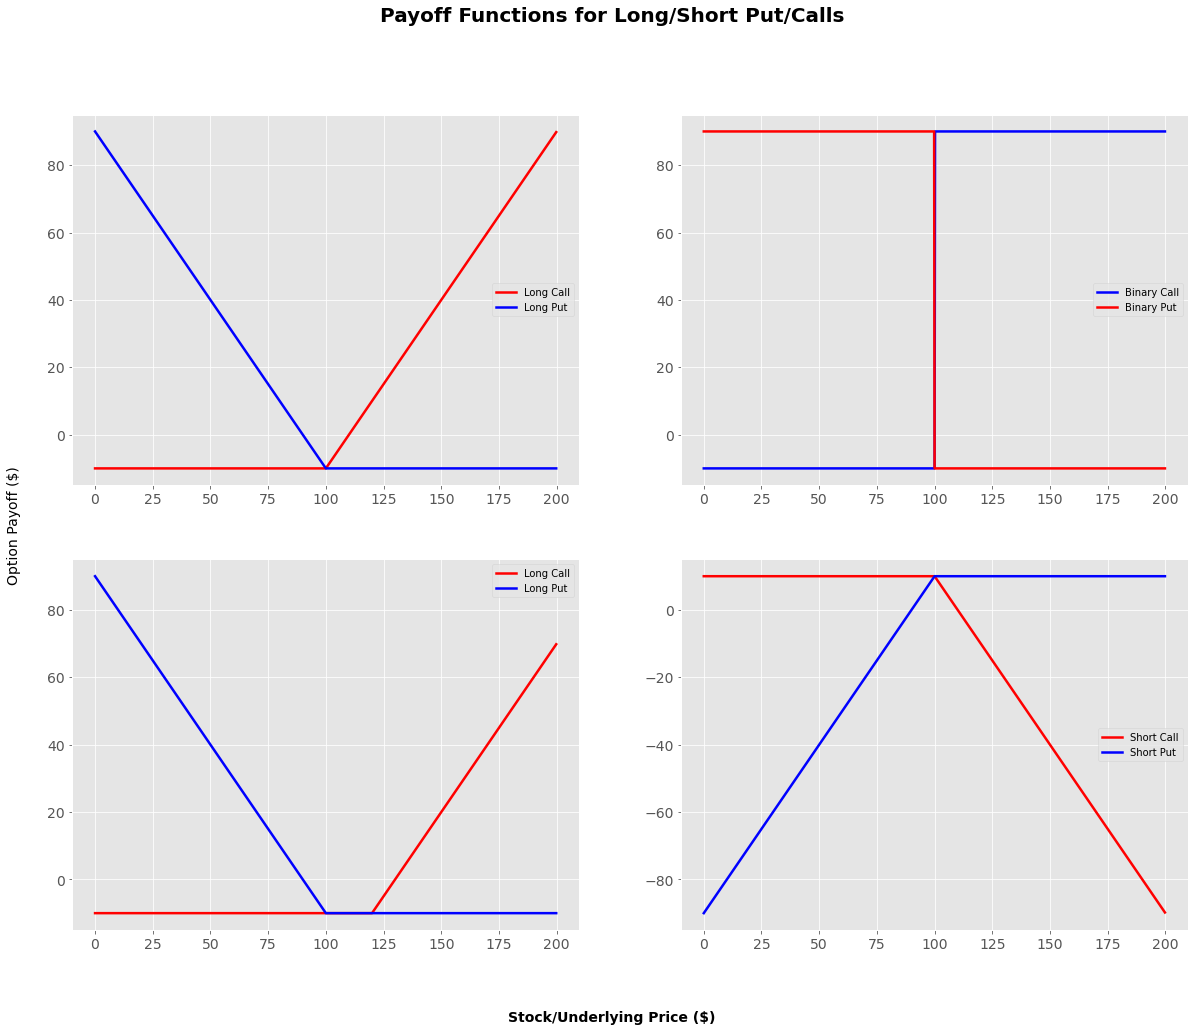

In [3]:
S = [t/5 for t in range(0, 1000)]  # Define some series of stock prices
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(20, 15))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'Stock/Underlying Price ($)', ha='center', fontsize=14, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=14)

lc_P = long_call(S, 100, 10)
lp_P = long_put(S, 100, 10)
plt.subplot(221)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.legend(["Long Call", "Long Put"])

bc_P = binary_call(S, 100, 10)
bp_P = binary_put(S, 100, 10)
plt.subplot(222)
plt.plot(S, bc_P, 'b')
plt.plot(S, bp_P, 'r')
plt.legend(["Binary Call", "Binary Put"])

T2 = long_call(S, 120, 10)
T4 = long_put(S, 100, 10)
plt.subplot(223)
plt.plot(S, T2, 'r')
plt.plot(S, T4, 'b')
plt.legend(["Long Call", "Long Put"])

sc_P = short_call(S, 100, 10)
sp_P = short_put(S, 100, 10)
plt.subplot(224)
plt.plot(S, sc_P, 'r')
plt.plot(S, sp_P, 'b')
plt.legend(["Short Call", "Short Put"])

plt.show()

## PART 2

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

In [5]:
#### make a function that lets you specify a few parameters and calculates the payoff
# S = stock underlying # K = strike price # Price = premium paid for option
def long_call(S, K, Price):
    # Long Call Payoff = max(Stock Price - Strike Price, 0) # If we are long a call
    P = list(map(lambda x: max(x - K, 0) - Price, S))
    return P

def long_put(S, K, Price):
    # Long Put Payoff = max(Strike Price - Stock Price, 0) # If we are long a call
    P = list(map(lambda x: max(K - x, 0) - Price, S))
    return P

def short_call(S, K, Price):
    # Payoff of a short call is just the inverse of the payoff of a long call
    P = long_call(S, K, Price)
    return [-1.0 * p for p in P]

def short_put(S, K, Price):
    # Payoff of a short put is just the inverse of the payoff of a long put
    P = long_put(S, K, Price)
    return [-1.0 * p for p in P]

def binary_call(S, K, Price):
    # Payoff of a binary call is either: # 1. Strike if current price > strike
    P = list(map(lambda x: K - Price if x > K else 0 - Price, S))
    return P

def binary_put(S, K, Price):
    # Payoff of a binary put is either: # 1. Strike if current price < strike
    P = list(map(lambda x: K - Price if x < K else 0 - Price, S))
    return P

def bull_spread(S, E1, E2, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = short_call(S, E2, Price2)
    return [x+y for x, y in zip(P_1, P_2)]

def bear_spread(S, E1, E2, Price1, Price2):
    P = bull_spread(S, E1, E2, Price1, Price2)
    return [-1.0 * p + 1.0 for p in P]

def straddle(S, E, Price1, Price2):
    P_1 = long_call(S, E, Price1)
    P_2 = long_put(S, E, Price2)
    return [x+y for x, y in zip(P_1, P_2)]

def risk_reversal(S, E1, E2, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = short_put(S, E2, Price2)
    return [x + y for x, y in zip(P_1, P_2)]

def strangle(S, E1, E2, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = long_put(S, E2, Price2)
    return [x + y for x, y in zip(P_1, P_2)]

def butterfly_spread(S, E1, E2, E3, Price1, Price2, Price3):
    P_1 = long_call(S, E1, Price1)
    P_2 = long_call(S, E3, Price3)
    P_3 = short_call(S, E2, Price2)
    P_3 = [2 * p for p in P_3]
    return [x + y + z for x, y, z in zip(P_1, P_2, P_3)]

def strip(S, E1, Price1, Price2):
    P_1 = long_call(S, E1, Price1)
    P_2 = long_put(S, E1, Price2)
    P_2 = [2 * p for p in P_2]
    return [x + y for x, y in zip(P_1, P_2)]

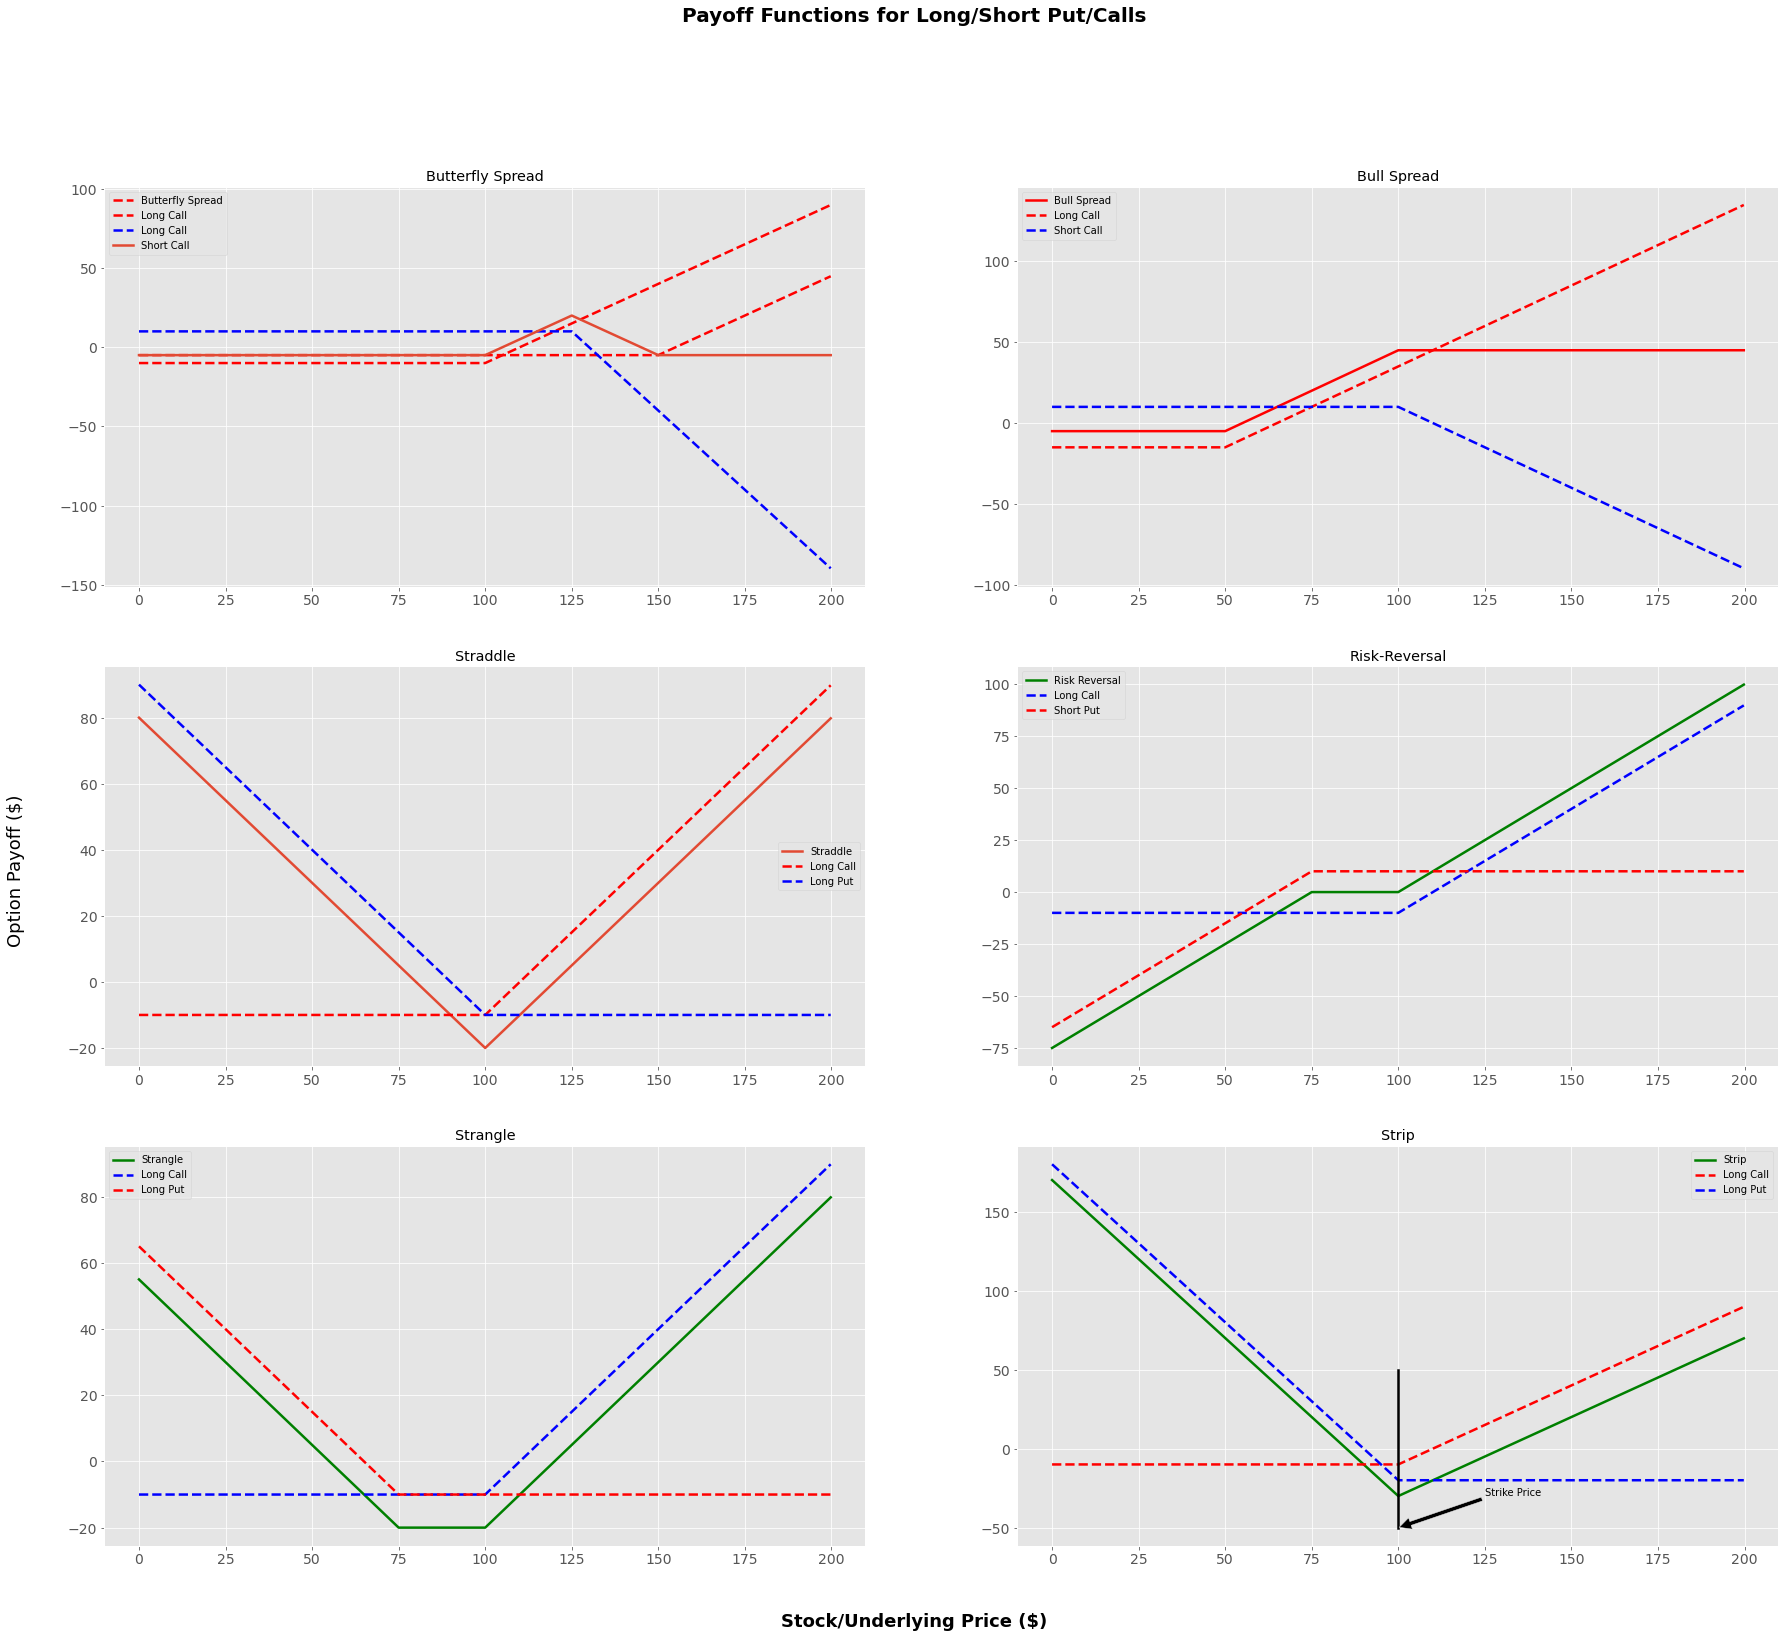

In [6]:
S = [t / 5 for t in range(0, 1000)]  # Define some series of stock-prices
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(30, 25))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=18)

plt.subplot(321)
P = butterfly_spread(S, 100, 125, 150, 10, 5, 5)
P_1 = long_call(S, 100, 10)
P_2 = long_call(S, 150, 5)
P_3 = short_call(S, 125, 5)
P_3 = [2 * p for p in P_3]
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'r--')
plt.plot(S, P_3, 'b--')
plt.plot(S, P)
plt.legend(["Butterfly Spread", "Long Call", "Long Call", "Short Call"])
plt.title("Butterfly Spread")

plt.subplot(322)
P1 = bull_spread(S, 50, 100, 15, 10)
long_c = long_call(S, 50, 15)
short_c = short_call(S, 100, 10)
plt.plot(S, P1, 'r')
plt.plot(S, long_c, 'r--')
plt.plot(S, short_c, 'b--')
plt.legend(["Bull Spread", "Long Call", "Short Call"])
plt.title("Bull Spread")

plt.subplot(323)
P = straddle(S, 100, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 100, 10)
plt.plot(S, P)
plt.plot(S, P_longcall, 'r--')
plt.plot(S, P_longput, 'b--')
plt.legend(["Straddle", "Long Call", "Long Put"])
plt.title("Straddle")

plt.subplot(324)
P = risk_reversal(S, 100, 75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_shortput = short_put(S, 75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_shortput, 'r--')
plt.legend(["Risk Reversal", "Long Call", "Short Put"])
plt.title("Risk-Reversal")

plt.subplot(325)
P = strangle(S, 100, 75, 10, 10)
P_longcall = long_call(S, 100, 10)
P_longput = long_put(S, 75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_longput, 'r--')
plt.legend(["Strangle", "Long Call", "Long Put"])
plt.title("Strangle")

plt.subplot(326)
P_1 = long_call(S, 100, 10)
P_2 = long_put(S, 100, 10)
P_2 = [2 * p for p in P_2]
P = strip(S, 100, 10, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100, 100], [-50, 50], 'black')
plt.legend(["Strip", "Long Call", "Long Put"])
plt.annotate('Strike Price',
             xy=(100, -50),
             xytext=(125, -30),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.title("Strip")

plt.show()

## EQUATION AND GREEKS

In [7]:
from scipy.stats import norm
import numpy as np

In [8]:
# S: underlying stock price
# K: Option strike price
# r: risk-free rate
# vol: volatility
# T: time to maturity
# t: time to current date

def d1_calc(S, K, r, vol, T, t):
    # Calculates d1 in the Black-Scholes-Merton equation
    return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))

def BS_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    return S * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

def BS_put(S, K, r, vol, T, t):
    return BS_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

def BS_binary_call(S, K, r, vol, T, t):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)
    return np.exp(-r*T)*norm.cdf(d2)

def BS_binary_put(S, K, r, vol, T, t):
    return BS_binary_call(S, K, r, vol, T, t) - S + np.exp(-r*(T-t))*K

In [9]:
###########################################################################

# 1st Order Greeks

def delta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol * np.sqrt(T-t)

    if otype == "call":
        delta = np.exp(-(T-t))*norm.cdf(d1)
    elif otype == "put":
        delta = -np.exp(-(T-t))*norm.cdf(-d1)

    return delta

# Gamma for calls/puts is the same

def vega(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    return S * norm.pdf(d1) * np.sqrt(T-t)

def rho(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)

    if otype == "call":
        rho = K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d2)
    elif otype == "put":
        rho = -K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d2)

    return rho

def theta(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)

    if otype == "call":
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) - r*K*np.exp(-r*(T-t))*norm.cdf(d2)
    elif otype == "put":
        theta = -(S*norm.pdf(d1)*vol / (2*np.sqrt(T-t))) + r*K*np.exp(-r*(T-t))*norm.cdf(-d2)

    return theta

# 2nd Order Greeks

def gamma(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    gamma = (norm.pdf(d1)) / (S * vol * np.sqrt(T-t))
    return gamma

def charm(S, K, r, vol, T, t, otype):
    d1 = d1_calc(S, K, r, vol, T, t)
    d2 = d1 - vol*np.sqrt(T-t)
    charm = -norm.pdf(d1)*(2*r*(T-t) - d2*vol*np.sqrt(T-t))/(2*(T-t)*vol*np.sqrt(T-t))
    return charm

<ipython-input-8-f6c30159012e>:10: RuntimeWarning: divide by zero encountered in log
  return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))


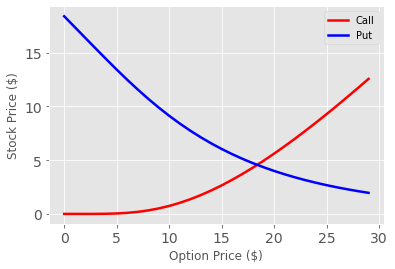

In [10]:
S = np.arange(0, 30)
vals_call = [BS_call(x, 50, 0.10, 0.2, 10, 0) for x in S]
vals_put = [BS_put(x, 50, 0.10, 0.2, 10, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label = "Put")
plt.legend()
plt.ylabel("Stock Price ($)")
plt.xlabel("Option Price ($)")
plt.show()


## GREEKS

In [11]:
import matplotlib.pyplot as plt
import numpy as np

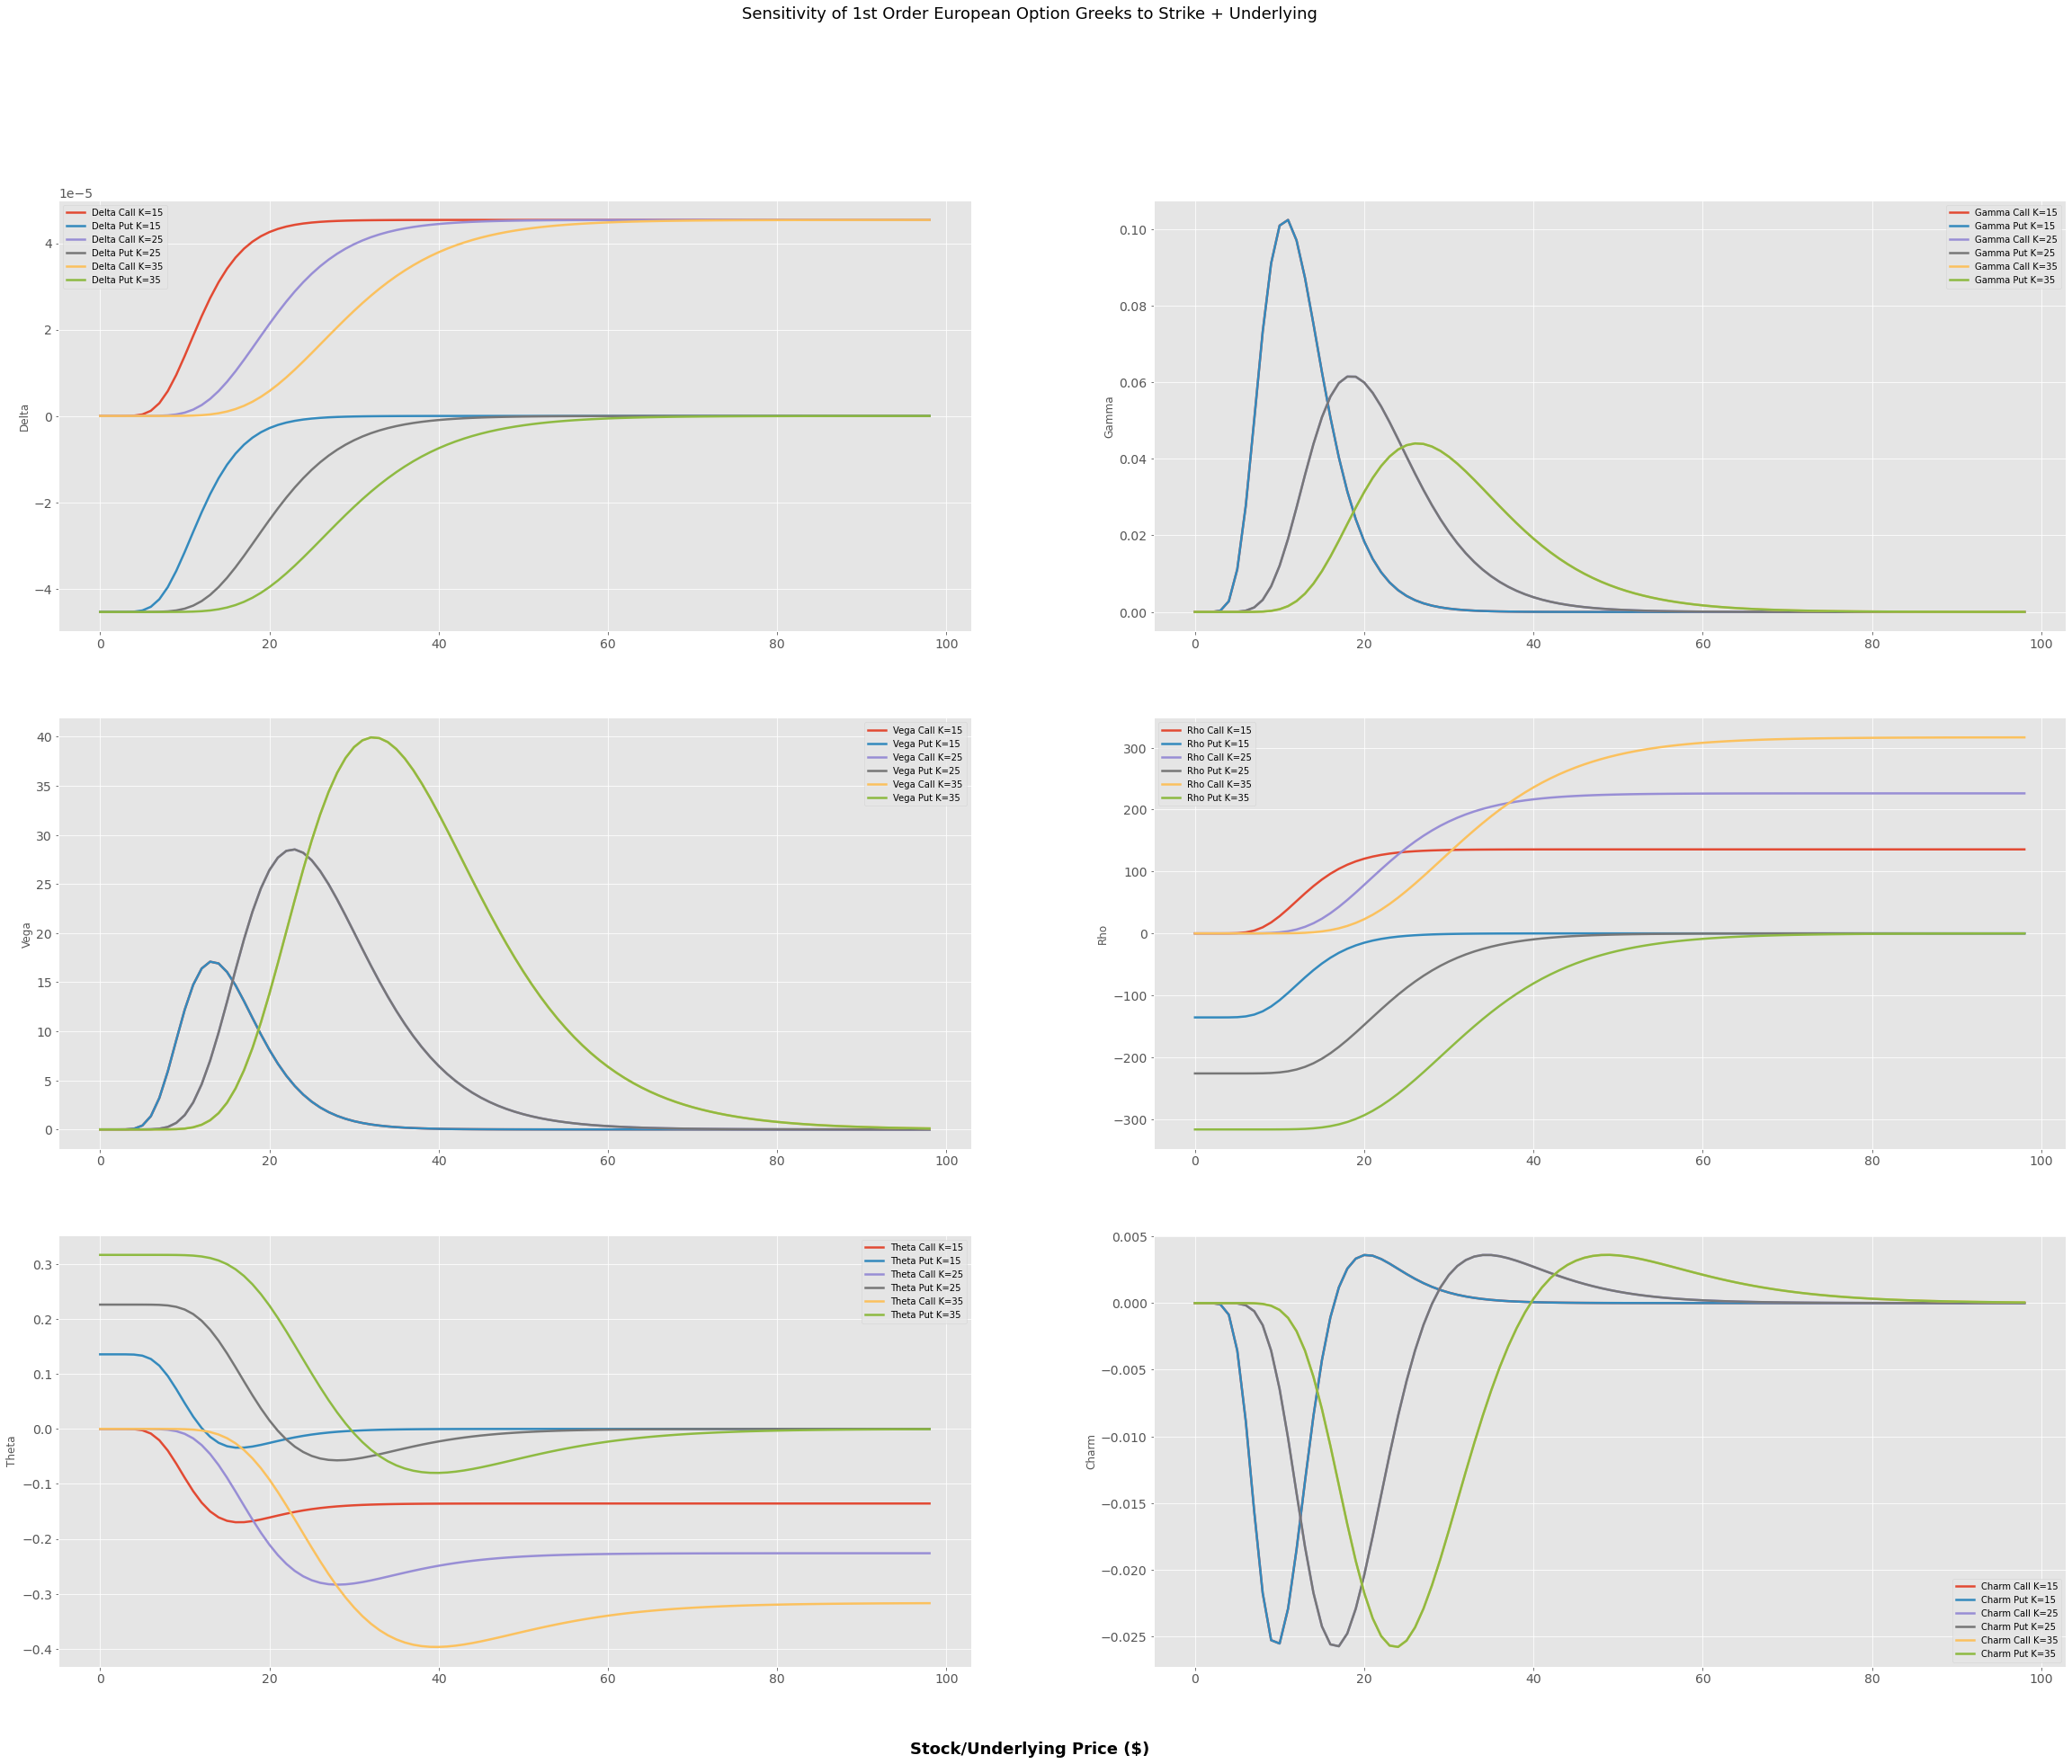

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(40, 30))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to Strike + Underlying')

fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=18, fontweight='bold')

vals = [15, 25, 35]
r = 0.01
vol = 0.1
T = 10
t = 0

plt.subplot(321)
for i in vals:
    tmp_c = [delta(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [delta(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Delta Call K=%i" % i))
    plt.plot(tmp_p, label=("Delta Put K=%i" % i))

plt.ylabel("Delta")
plt.legend()

plt.subplot(322)
for i in vals:
    tmp_c = [gamma(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [gamma(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Gamma Call K=%i" % i))
    plt.plot(tmp_p, label=("Gamma Put K=%i" % i))

plt.ylabel("Gamma")
plt.legend()

plt.subplot(323)
for i in vals:
    tmp_c = [vega(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [vega(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Vega Call K=%i" % i))
    plt.plot(tmp_p, label=("Vega Put K=%i" % i))

plt.ylabel("Vega")
plt.legend()

plt.subplot(324)
for i in vals:
    tmp_c = [rho(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [rho(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Rho Call K=%i" % i))
    plt.plot(tmp_p, label=("Rho Put K=%i" % i))

plt.ylabel("Rho")
plt.legend()

plt.subplot(325)
for i in vals:
    tmp_c = [theta(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [theta(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Theta Call K=%i" % i))
    plt.plot(tmp_p, label=("Theta Put K=%i" % i))

plt.ylabel("Theta")
plt.legend()

plt.subplot(326)
for i in vals:
    tmp_c = [charm(s, i, r, vol, T, t, "call") for s in np.arange(1, 100)]
    tmp_p = [charm(s, i, r, vol, T, t, "put") for s in np.arange(1, 100)]
    plt.plot(tmp_c, label=("Charm Call K=%i" % i))
    plt.plot(tmp_p, label=("Charm Put K=%i" % i))

plt.ylabel("Charm")
plt.legend()

plt.show()